In [1]:

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt



In [2]:
mean_gray = 0.1307
stddev_gray = 0.3081

transforms1 = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((mean_gray,),(stddev_gray,))])
train_dataset = datasets.MNIST(root='./Dev/PythonDeepLearning/The-Complete-Neural-Networks-Bootcamp-Theory-Applications/'
                               ,train=True, transform=transforms1,
                              download=True)
test_dataset = datasets.MNIST(root='./Dev/PythonDeepLearning/The-Complete-Neural-Networks-Bootcamp-Theory-Applications/'
                               ,train=False, transform=transforms1)


Extracting ./Dev/PythonDeepLearning/The-Complete-Neural-Networks-Bootcamp-Theory-Applications/MNIST\raw\train-images-idx3-ubyte.gz to ./Dev/PythonDeepLearning/The-Complete-Neural-Networks-Bootcamp-Theory-Applications/MNIST\raw


Extracting ./Dev/PythonDeepLearning/The-Complete-Neural-Networks-Bootcamp-Theory-Applications/MNIST\raw\train-labels-idx1-ubyte.gz to ./Dev/PythonDeepLearning/The-Complete-Neural-Networks-Bootcamp-Theory-Applications/MNIST\raw


Extracting ./Dev/PythonDeepLearning/The-Complete-Neural-Networks-Bootcamp-Theory-Applications/MNIST\raw\t10k-images-idx3-ubyte.gz to ./Dev/PythonDeepLearning/The-Complete-Neural-Networks-Bootcamp-Theory-Applications/MNIST\raw




Extracting ./Dev/PythonDeepLearning/The-Complete-Neural-Networks-Bootcamp-Theory-Applications/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./Dev/PythonDeepLearning/The-Complete-Neural-Networks-Bootcamp-Theory-Applications/MNIST\raw
Processing...
Done!


C:\Users\massy\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


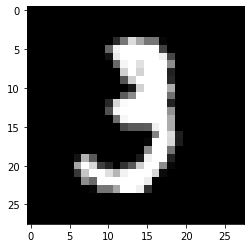

In [3]:
random_img = train_dataset[10][0].numpy() * stddev_gray + mean_gray
plt.imshow(random_img.reshape(28,28), cmap= 'gray')

In [4]:
print(train_dataset[10][1])

3


In [5]:
batch_size = 100
train_load = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_laod =  torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        #Grayscale image so 1 chanel
        # We want same padding so: (filter_size -1)/2 --> (3-1)/2 = 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=8,kernel_size=3, stride=1, padding=1)
        # The output feature map of each of the 8 feature maps:
        # [(input_size - filter_size + 2 (padding))/stride +1] = (28 - 3 + 2(1))/1  + 1 = 28
        self.batchnorm1 = nn.BatchNorm2d(8)
        self.relu = nn.ReLU()
         #The output_size = 28/2 = 14
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        # The number of output from the last layer is 8 so we also have 8 intput channels
        # We want same padding so: (filter_size -1)/2 --> (5-1)2 = 2
        self.cnn2 = nn.Conv2d(in_channels=8, out_channels=32,kernel_size=5, stride=1, padding=2)
        #Output size of each of the 32 feature maps:
        #[(input_size - filter_size + 2 (padding))/stride +1] = (14 - 5 + 2(2))/1  + 1 = 14
        self.batchnorm2 = nn.BatchNorm2d(32)
        # Flatten 32 feature map : 7*7*32 = 1568
        self.fc1 = nn.Linear(1568, 600)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(600,10)
    
    def forward(self, x):
        out = self.cnn1(x)
        out = self.batchnorm1(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.cnn2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        #Flatten
        out = out.view(-1, 1568)
        
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

In [7]:
model = CNN()
CUDA = torch.cuda.is_available()
if CUDA:
    model = model.cuda()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Epoch 1/10, Training Loss: 0.057, Training Accuracy: 98.400, Testing Loss: 0.041, Testing Accuracy : 98.960
Epoch 2/10, Training Loss: 0.052, Training Accuracy: 98.558, Testing Loss: 0.041, Testing Accuracy : 98.860
Epoch 3/10, Training Loss: 0.047, Training Accuracy: 98.673, Testing Loss: 0.040, Testing Accuracy : 98.870
Epoch 4/10, Training Loss: 0.050, Training Accuracy: 98.648, Testing Loss: 0.037, Testing Accuracy : 99.060
Epoch 5/10, Training Loss: 0.045, Training Accuracy: 98.745, Testing Loss: 0.040, Testing Accuracy : 99.130
Epoch 6/10, Training Loss: 0.052, Training Accuracy: 98.595, Testing Loss: 0.034, Testing Accuracy : 99.150
Epoch 7/10, Training Loss: 0.045, Training Accuracy: 98.752, Testing Loss: 0.039, Testing Accuracy : 99.110
Epoch 8/10, Training Loss: 0.045, Training Accuracy: 98.745, Testing Loss: 0.036, Testing Accuracy : 99.110
Epoch 9/10, Training Loss: 0.038, Training Accuracy: 98.970, Testing Loss: 0.048, Testing Accuracy : 99.000
Epoch 10/10, Training Loss: 

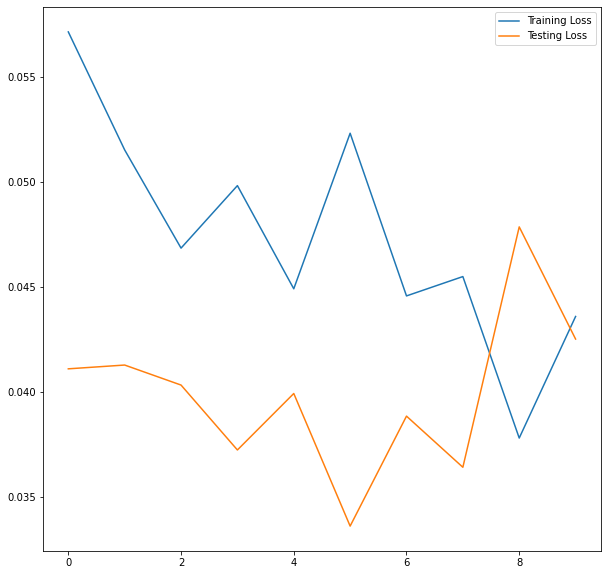

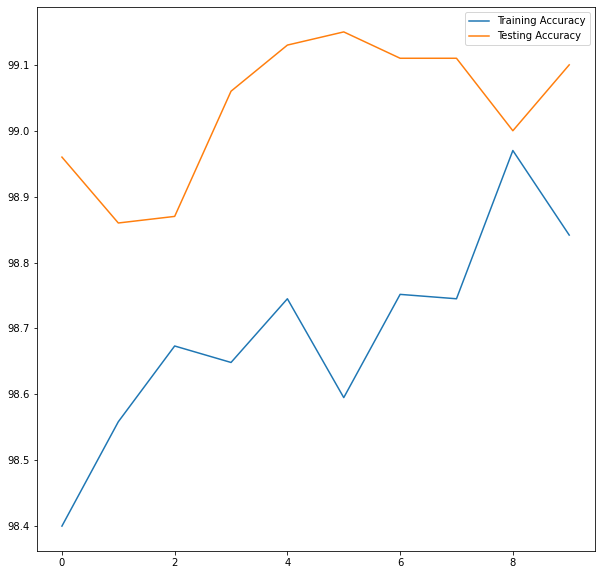

In [14]:
num_epochs = 10
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(num_epochs):
    correct = 0
    iterations = 0
    iter_loss = 0.0
    
    model.train()
    
    for i, (inputs,labels) in enumerate(train_load):
   
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
            
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        iter_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _,predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        iterations += 1
    
    train_loss.append(iter_loss/iterations)
    train_accuracy.append(100 * correct/len(train_dataset))
    
    test_loss1= 0.0
    correct = 0
    iterations = 0
    
    model.eval()
    
    for i, (inputs,labels) in enumerate(test_laod):
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
            
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        test_loss1 += loss.item()
        
        
        _,predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        iterations += 1
    
    test_loss.append(test_loss1/iterations)
    test_accuracy.append(100 *correct/len(test_dataset))
    
    print("Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}, Testing Loss: {:.3f}, Testing Accuracy : {:.3f}"
          .format(epoch+1,num_epochs, train_loss[-1], train_accuracy[-1], test_loss[-1], test_accuracy[-1]))

f = plt.figure(figsize= (10,10))
plt.plot(train_loss, label= 'Training Loss')
plt.plot(test_loss, label= 'Testing Loss')
plt.legend()
plt.show()

f = plt.figure(figsize= (10,10))
plt.plot(train_accuracy, label= 'Training Accuracy')
plt.plot(test_accuracy, label= 'Testing Accuracy')
plt.legend()
plt.show()